# Stockwater Data (House and Senate) EDA

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = "../data/"

## Senate
https://senatestockwatcher.com/

In [3]:
senate = pd.read_csv(DATA_PATH + "senate_all_transactions.csv")
senate[:5]

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
0,08/10/2022,Spouse,--,"Parker-Hannifin Corp 701094AQ7 <div class=""tex...",Corporate Bond,Purchase,"$15,001 - $50,000",--,Susan M Collins,https://efdsearch.senate.gov/search/view/ptr/7...,09/16/2022
1,08/01/2022,Self,IVV,iShares Core S&amp;P 500 ETF,Stock,Sale (Full),"$15,001 - $50,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/7...,09/15/2022
2,08/01/2022,Self,EFAV,iShares MSCI EAFE Min Vol Factor ETF,Stock,Sale (Full),"$15,001 - $50,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/7...,09/15/2022
3,08/01/2022,Self,XLY,SPDR Select Sector Fund - Consumer Discretionary,Stock,Sale (Full),"$15,001 - $50,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/7...,09/15/2022
4,08/01/2022,Self,VTRS,Viatris Inc. - Common Stock,Stock,Sale (Full),"$1,001 - $15,000",--,Thomas H Tuberville,https://efdsearch.senate.gov/search/view/ptr/7...,09/15/2022


#### Extract stock-only transaction data

In [15]:
senate_stock = senate[senate["asset_type"] == "Stock"][["transaction_date", "owner", "ticker", "type", "senator"]].dropna()
senate_stock["amount"] = senate[senate["asset_type"] == "Stock"]["amount"].str.extract(r"\$(.*)\s-")[0].str.replace(",", "")
senate_stock = senate_stock.replace("--", np.nan)
senate_stock = senate_stock.dropna()
senate_stock["amount"] = senate_stock["amount"].astype(int)
senate_stock["transaction_date"] = list(map(lambda x: datetime.strptime(x, '%m/%d/%Y'), senate_stock["transaction_date"]))
senate_stock

,transaction_date,owner,ticker,type,senator,amount
1,2022-08-01,Self,IVV,Sale (Full),Thomas H Tuberville,15001
2,2022-08-01,Self,EFAV,Sale (Full),Thomas H Tuberville,15001
3,2022-08-01,Self,XLY,Sale (Full),Thomas H Tuberville,15001
4,2022-08-01,Self,VTRS,Sale (Full),Thomas H Tuberville,1001
5,2022-08-01,Self,ABNFX,Purchase,Thomas H Tuberville,15001
...,...,...,...,...,...,...
8624,2014-12-11,Spouse,DVFAX,Purchase,Susan M Collins,1001
8630,2014-12-12,Spouse,XOM,Sale (Full),Pat Roberts,1001
8631,2014-12-19,Spouse,BA,Purchase,Pat Roberts,1001
8632,2014-12-12,Spouse,BAC,Sale (Full),Pat Roberts,1001


In [16]:
# senate_stock.to_csv(DATA_PATH+"senate_stock.csv", index=False)

In [6]:
senate_stock.dtypes

transaction_date    datetime64[ns]
owner                       object
ticker                      object
type                        object
senator                     object
amount                       int32
dtype: object

In [18]:
len(senate_stock["ticker"].unique())

981

#### Summary Statistics

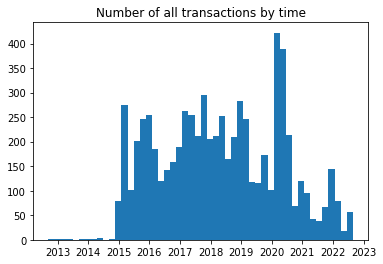

In [7]:
plt.hist(senate_stock["transaction_date"], bins=50)
plt.title("Number of all transactions by time");

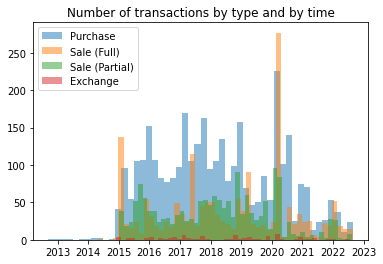

In [8]:
for transaction_type in ['Purchase', 'Sale (Full)', 'Sale (Partial)', 'Exchange']:
    plt.hist(senate_stock[senate_stock["type"] == transaction_type]["transaction_date"], 
             bins=50, alpha=0.5, label=transaction_type)
plt.legend()
plt.title("Number of transactions by type and by time");

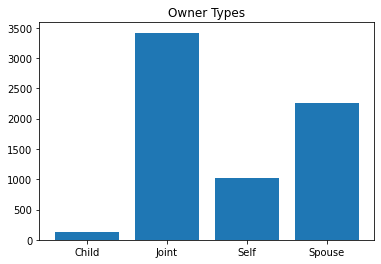

In [9]:
owner_categories = senate_stock.groupby("owner").count()
plt.bar(owner_categories.index, owner_categories["transaction_date"])
plt.title("Owner Types");

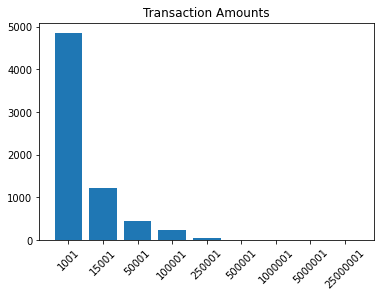

In [10]:
amount_categories = senate_stock.groupby("amount").count()
plt.bar(amount_categories.index.astype(str), amount_categories["transaction_date"])
plt.xticks(rotation = 45)
plt.title("Transaction Amounts");

## House
https://housestockwatcher.com/

In [11]:
house = pd.read_csv(DATA_PATH + "house_all_transactions.csv")
house[:5]

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


In [33]:
house[house["ticker"]=="ZOOM"]

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
11768,2021,02/13/2021,2021-01-15,self,ZOOM,"Zoom Technologies, Inc.",sale_full,"$1,001 - $15,000",None Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,True
11769,2021,02/13/2021,2021-01-15,self,ZOOM,"Zoom Technologies, Inc.",sale_full,"$1,001 - $15,000",None Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,True
11770,2021,02/13/2021,2021-01-04,self,ZOOM,"Zoom Technologies, Inc.",purchase,"$1,001 - $15,000",None Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False


In [34]:
house[(house["district"]=="IL03") & (house["ticker"] == "ZM") | (house["ticker"] == "ZOOM")].sort_values(by="transaction_date")

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
11770,2021,02/13/2021,2021-01-04,self,ZOOM,"Zoom Technologies, Inc.",purchase,"$1,001 - $15,000",None Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
11771,2021,02/13/2021,2021-01-04,self,ZM,"Zoom Video Communications, Inc. - Class A",sale_full,"$15,001 - $50,000",None Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
11768,2021,02/13/2021,2021-01-15,self,ZOOM,"Zoom Technologies, Inc.",sale_full,"$1,001 - $15,000",None Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,True
11769,2021,02/13/2021,2021-01-15,self,ZOOM,"Zoom Technologies, Inc.",sale_full,"$1,001 - $15,000",None Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,True
11482,2021,04/15/2021,2021-02-08,self,ZM,Zoom Video Communications Inc Class A,purchase,"$1,001 - $15,000",Hon. Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
11480,2021,04/15/2021,2021-02-11,self,ZM,Zoom Video Communications Inc Class A,purchase,"$15,001 - $50,000",Hon. Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
11481,2021,04/15/2021,2021-02-11,self,ZM,Zoom Video Communications Inc Class A,sale_full,"$15,001 - $50,000",Hon. Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
11483,2021,04/15/2021,2021-02-11,self,ZM,Zoom Video Communications Inc Class A,purchase,"$1,001 - $15,000",Hon. Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
11522,2021,04/15/2021,2021-03-01,self,ZM,Zoom Video Communications Inc Class A,sale_full,"$1,001 - $15,000",Hon. Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
11523,2021,04/15/2021,2021-03-01,self,ZM,Zoom Video Communications Inc Class A,sale_full,"$1,001 - $15,000",Hon. Marie Newman,IL03,https://disclosures-clerk.house.gov/public_dis...,False
